# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Firman WIjaya Kusuma
- **Email:** firmanwijayakusuma11@gmail.com
- **ID Dicoding:** firmanwijaya22

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda setiap bulan atau musim?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Kapan waktu tersibuk dalam sehari untuk penggunaan sepeda?
- Apakah ada perbedaan signifikan antara hari kerja dan akhir pekan dalam penggunaan sepeda?
- Bagaimana perbedaan antara pengguna kasual dan terdaftar dalam meminjam sepeda?




## Import Semua Packages/Library yang Digunakan

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [92]:
#melihat data hari pada (day.csv)
df_day = pd.read_csv("day.csv")
df_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
#melihat data jam pada (hour.csv)
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [94]:
# Mengecek informasi umum tentang day.csv
df_day.info()

# Mengecek jumlah nilai unik untuk setiap kolom
df_day.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Insight:**
Terlihat dari data hari(day) tidak ada data yang hilang semua kolom memiliki 731 nilai non-null.
Kolom "dteday" bertipe object, sebaiknya diubah menjadi datetime.
Tidak ada duplikasi instant memiliki 731 nilai unik, sama dengan jumlah baris.
Distribusi data terlihat wajar musim ada 4 nilai unik, bulan 12, hari dalam seminggu 7, dll.

In [95]:
# Mengecek informasi umum tentang hour.csv
df_hour.info()

# Mengecek jumlah nilai unik untuk setiap kolom
df_hour.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


Dari data hour(jam) tidak ada data yang hilang semua kolom memiliki 17.379 nilai non-null.
Kolom "dteday" bertipe object, sebaiknya diubah menjadi datetime.
Kolom "hr" memiliki 24 nilai unik (0-23), sesuai dengan data per jam.
Tidak ada duplikasi (instant memiliki 17.379 nilai unik)


---



Dari data tersebut kita bisa ambil kesimpulan bahwa data yang diberikan cukup bersih dan hanya memiliki satu masalah yang sama yaitu "dteday" yang bertipe objek

In [96]:
#melihat duplikasi data
print("duplikasi data : ", df_day.duplicated().sum())
print("duplikasi data : ", df_hour.duplicated().sum())

duplikasi data :  0
duplikasi data :  0


In [97]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [98]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [99]:
# Mengubah kolom 'dteday' menjadi tipe datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [100]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [101]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [102]:
# mapping musim
season_mapping = {
    1: "Spring",  # Musim Semi
    2: "Summer",  # Musim Panas
    3: "Fall",    # Musim Gugur
    4: "Winter"   # Musim Dingin
}

# Mengubah nilai season menjadi label yang lebih mudah dipahami
df_day["season"] = df_day["season"].map(season_mapping)

# Cek perubahan
df_day["season"].unique()


array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [103]:
# melihat rata-rata peminjaman sepeda setiap musim dan melihat musing dengan jumlahpeminjaman tertinggi dan terendah
# peminjaman sepeda berdasarkan musim
season_agg = df_day.groupby("season")["cnt"].agg(["mean", "max", "min"]).reset_index()

season_agg


,season,mean,max,min
0,Fall,5644.303191,8714,1115
1,Spring,2604.132597,7836,431
2,Summer,4992.331522,8362,795
3,Winter,4728.162921,8555,22


Musim gugur (Fall) memiliki rata-rata peminjaman tertinggi Menunjukkan bahwa cuaca di musim ini lebih ideal untuk bersepeda.
Musim dingin (Winter) memiliki peminjaman terendah Kemungkinan karena cuaca dingin dan bersalju yang mengurangi minat pengguna.

In [104]:
#mapping hari kerja vs akhir pekan
workingday_mapping = {
    0: "Weekend",  # Akhir Pekan
    1: "Weekday"   # Hari Kerja
}

# Mengubah nilai workingday menjadi label yang lebih mudah dipahami
df_day["workingday"] = df_day["workingday"].map(workingday_mapping)

# Cek perubahan
df_day["workingday"].unique()


array(['Weekend', 'Weekday'], dtype=object)

In [105]:
# melihat pola peminjaman antara hari kerja dan akhir pekan
# peminjaman sepeda berdasarkan hari kerja vs akhir pekan
workingday_agg = df_day.groupby("workingday")["cnt"].agg(["mean", "max", "min"]).reset_index()

workingday_agg


,workingday,mean,max,min
0,Weekday,4584.820000,8362,22
1,Weekend,4330.168831,8714,605


Hari kerja memiliki peminjaman lebih tinggi dibanding akhir pekan Menunjukkan bahwa mayoritas pengguna memakai sepeda untuk transportasi

In [106]:
# peminjaman sepeda berdasarkan jam
hourly_agg = df_hour.groupby("hr")["cnt"].agg(["mean", "max", "min"]).reset_index()

hourly_agg


,hr,mean,max,min
0,0,53.898072,283,2
1,1,33.375691,168,1
2,2,22.869930,132,1
3,3,11.727403,79,1
4,4,6.352941,28,1
5,5,19.889819,66,1
6,6,76.044138,213,1
7,7,212.064649,596,1
8,8,359.011004,839,5
9,9,219.309491,426,14


Jam sibuk terjadi pada pukul 07:00 - 09:00 dan 17:00 - 19:00 Ini adalah jam berangkat dan pulang kerja, menunjukkan bahwa sepeda digunakan untuk commuting.
Peminjaman sangat rendah di tengah malam (00:00 - 05:00) Wajar karena pada waktu ini tidak banyak orang yang beraktivitas.

In [107]:
# dictionary untuk mapping kondisi cuaca
weather_mapping = {
    1: "Clear/Few Clouds",    # Cerah / Berawan sedikit
    2: "Mist/Cloudy",         # Berawan / Kabut
    3: "Light Rain/Snow",     # Hujan ringan / Salju ringan
    4: "Heavy Rain/Snow"      # Hujan lebat / Salju lebat
}

# Mengubah nilai weathersit menjadi label yang lebih mudah dipahami
df_day["weathersit"] = df_day["weathersit"].map(weather_mapping)

# Cek perubahan
df_day["weathersit"].unique()


array(['Mist/Cloudy', 'Clear/Few Clouds', 'Light Rain/Snow'], dtype=object)

In [108]:
# peminjaman sepeda berdasarkan kondisi cuaca
weather_agg = df_day.groupby("weathersit")["cnt"].agg(["mean", "max", "min"]).reset_index()
weather_agg


,weathersit,mean,max,min
0,Clear/Few Clouds,4876.786177,8714,431
1,Light Rain/Snow,1803.285714,4639,22
2,Mist/Cloudy,4035.862348,8362,605


Cuaca cerah memiliki rata-rata peminjaman tertinggi Pengguna lebih nyaman bersepeda saat cuaca baik.
Peminjaman menurun drastis saat hujan/salju Cuaca buruk mengurangi aktivitas pengguna.


In [109]:
# jumlah peminjaman dari pengguna kasual dan terdaftar
user_type_agg = df_day[["casual", "registered"]].agg(["mean", "max", "min"])

user_type_agg


,casual,registered
mean,848.176471,3656.172367
max,3410.000000,6946.000000
min,2.000000,20.000000


Pengguna terdaftar menyumbang mayoritas peminjaman Mereka lebih rutin menggunakan layanan sepeda.
Pengguna kasual lebih sedikit dan cenderung hanya meminjam sesekali, kemungkinan untuk rekreasi.

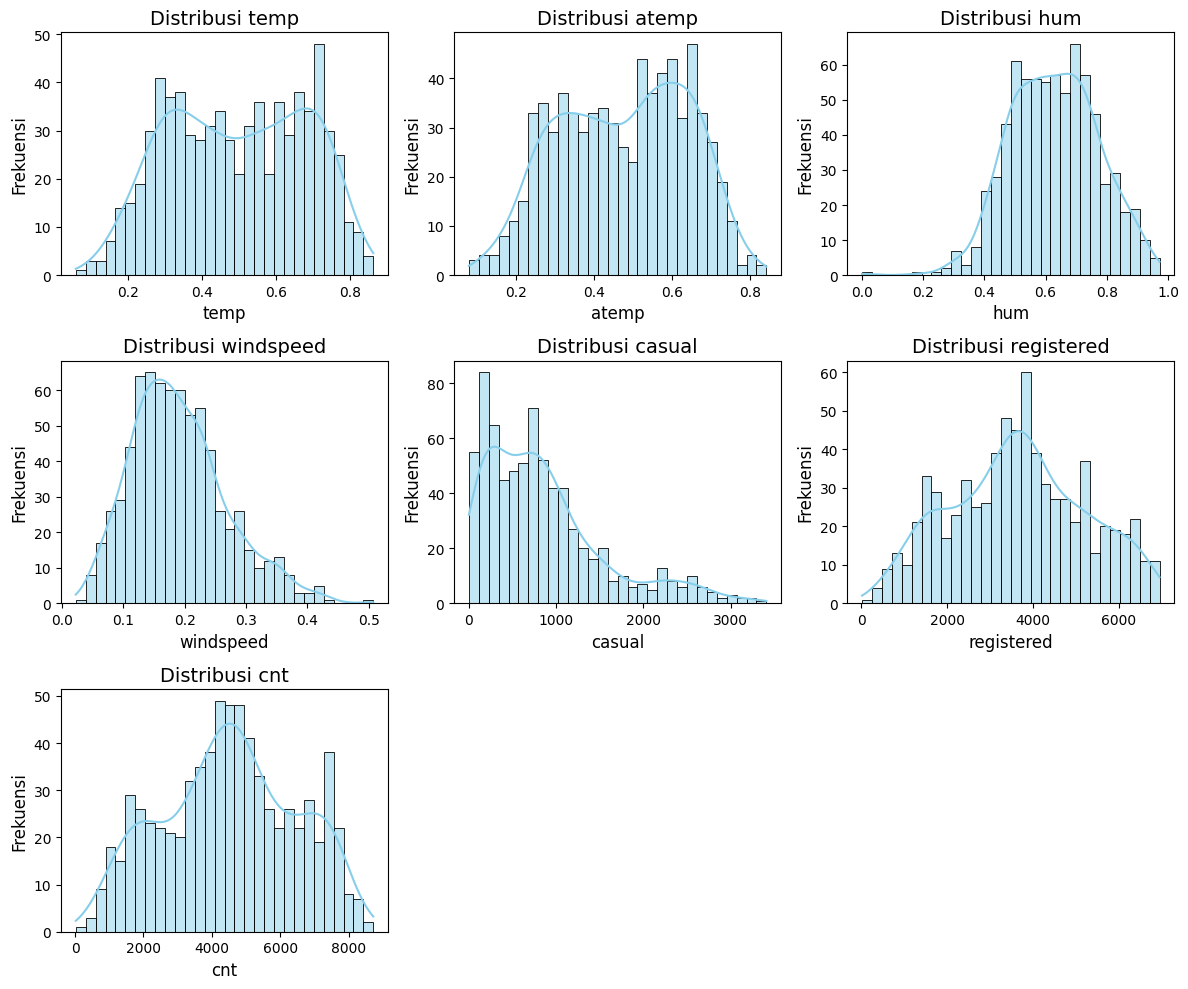

In [110]:
# Plot distribusi untuk kolom numerik utama
numeric_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_day[col], kde=True, bins=30, color="skyblue")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frekuensi", fontsize=12)
    plt.title(f"Distribusi {col}", fontsize=14)

plt.tight_layout()
plt.show()


Distribusi suhu (temp, atemp) cenderung normal, dengan mayoritas nilai berada di tengah rentang.
Kelembaban (hum) memiliki distribusi yang sedikit condong ke kanan, menunjukkan lebih banyak hari dengan kelembaban tinggi.
Kecepatan angin (windspeed) memiliki distribusi yang tidak merata, dengan banyak hari yang memiliki kecepatan angin rendah.
Distribusi jumlah peminjaman sepeda (cnt) memiliki kemiringan ke kanan, menunjukkan lebih banyak hari dengan jumlah peminjaman rendah hingga menengah, dan beberapa hari dengan peminjaman sangat tinggi.

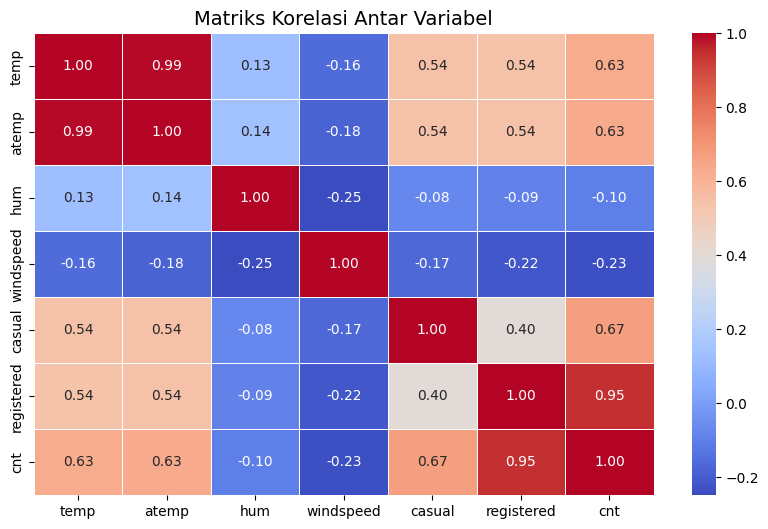

In [111]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = df_day[numeric_cols].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriks Korelasi Antar Variabel", fontsize=14)
plt.show()


Jumlah peminjaman sepeda (cnt) memiliki beberapa outlier di bagian atas, yang menunjukkan ada beberapa hari dengan peminjaman yang sangat tinggi dibandingkan hari lainnya.
Pengguna kasual (casual) memiliki outlier lebih banyak dibandingkan pengguna terdaftar (registered), menunjukkan adanya fluktuasi besar dalam perilaku pengguna kasual.
Kecepatan angin (windspeed) memiliki beberapa nilai ekstrem di bagian atas, yang mungkin perlu diperiksa lebih lanjut.
Suhu (temp) dan suhu terasa (atemp) tampaknya tidak memiliki outlier signifikan.

**Kesimpulan Awal**<br>
Suhu adalah faktor penting dalam peminjaman sepeda cuaca lebih hangat meningkatkan penggunaan sepeda.
Kecepatan angin & kelembaban berdampak kecil tetapi tetap memengaruhi jumlah peminjaman.
Pengguna terdaftar lebih konsisten dibandingkan pengguna kasual dalam menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penggunaan sepeda setiap bulan atau musim?

<ipython-input-112-28f08502a854>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="Blues")


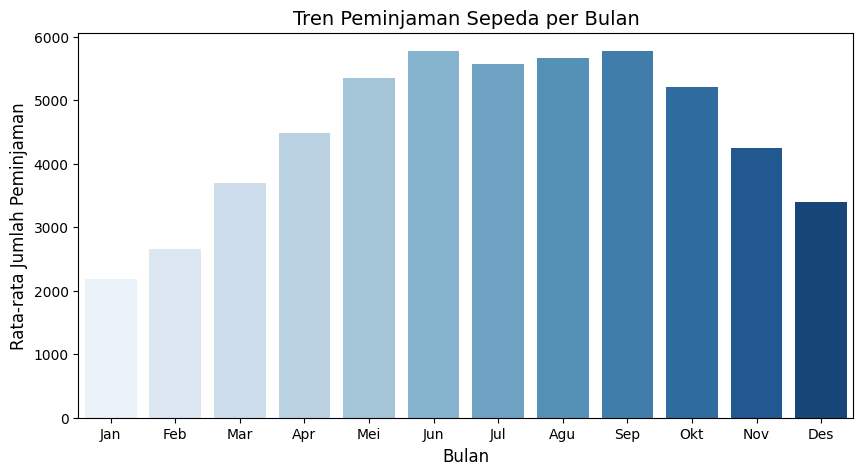

In [112]:
#Tren Peminjaman Sepeda per bulan
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata peminjaman sepeda (cnt)
monthly_trend = df_day.groupby("mnth")["cnt"].mean()

# Membuat visualisasi tren peminjaman sepeda per bulan
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="Blues")

plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Tren Peminjaman Sepeda per Bulan", fontsize=14)
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])

plt.show()


<ipython-input-113-8d0567f70f7a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_trend, x="season", y="cnt", palette="coolwarm")


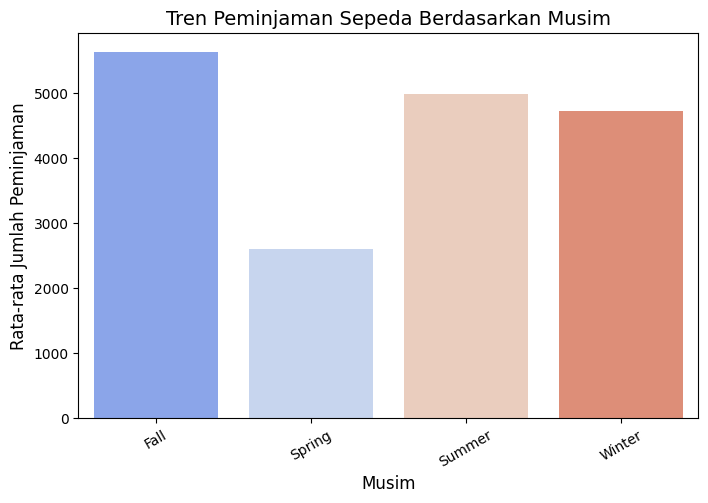

In [113]:
#Tren peminjaman sepeda berdasarkan Musim
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata peminjaman sepeda
season_trend = df_day.groupby("season")["cnt"].mean().reset_index()

# Membuat visualisasi tren peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_trend, x="season", y="cnt", palette="coolwarm")

plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Tren Peminjaman Sepeda Berdasarkan Musim", fontsize=14)
plt.xticks(rotation=30)

plt.show()


dari visualisasi berikut bisa dikatakan Musim gugur dan musim panas memiliki jumlah peminjaman tertinggi.
Musim dingin memiliki jumlah peminjaman terendah, kemungkinan karena cuaca lebih ekstrem.
Tren ini sesuai dengan pola penggunaan sepeda yang lebih tinggi saat cuaca lebih hangat.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

<ipython-input-114-dca9a974f067>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_trend, x="weathersit", y="cnt", palette="viridis")


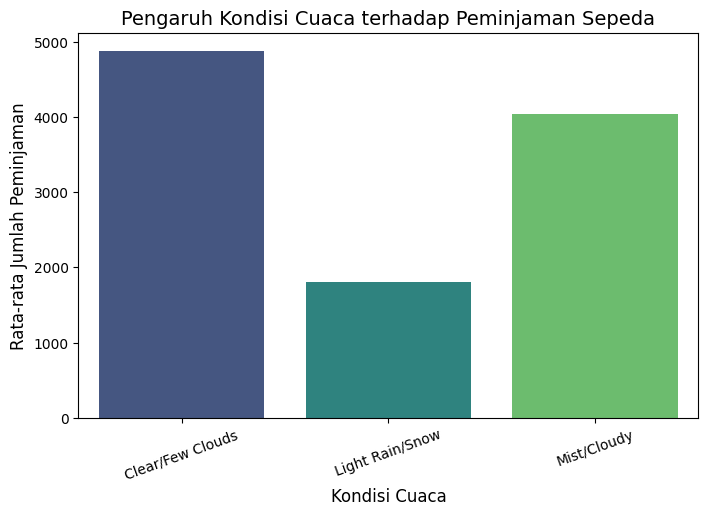

In [114]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata peminjaman sepeda
weather_trend = df_day.groupby("weathersit")["cnt"].mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_trend, x="weathersit", y="cnt", palette="viridis")

plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda", fontsize=14)
plt.xticks(rotation=20)  # Memiringkan label agar tidak bertumpuk

plt.show()


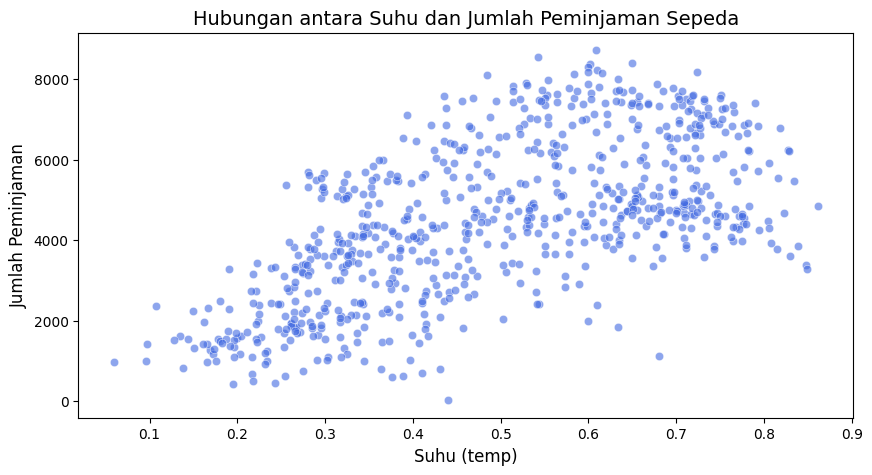

In [115]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_day["temp"], y=df_day["cnt"], alpha=0.6, color="royalblue")

plt.xlabel("Suhu (temp)", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.title("Hubungan antara Suhu dan Jumlah Peminjaman Sepeda", fontsize=14)

plt.show()


Semakin tinggi suhu, semakin banyak peminjaman sepeda.
Peminjaman meningkat signifikan saat suhu sedang (sekitar 0.4 - 0.7 dalam skala normalisasi dataset).
Saat suhu sangat rendah atau tinggi, peminjaman cenderung lebih sedikit.

### Pertanyaan 3 : Kapan waktu tersibuk dalam sehari untuk penggunaan sepeda?

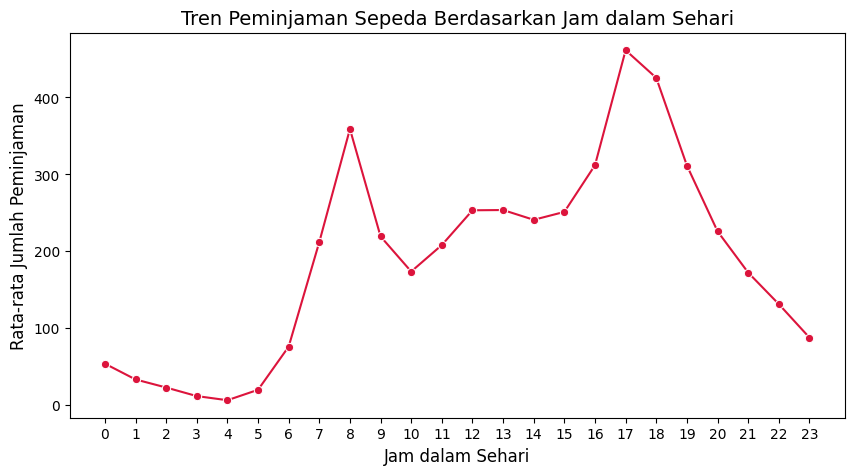

In [116]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata peminjaman sepeda
hourly_trend = df_hour.groupby("hr")["cnt"].mean()

# Membuat visualisasi tren peminjaman sepeda per jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker="o", color="crimson")

plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xticks(ticks=range(0, 24))

plt.show()


Peminjaman sepeda memuncak dua kali sehari:
- Pagi (sekitar pukul 07:00 - 09:00) Kemungkinan karena orang pergi bekerja/sekolah.
- Sore (sekitar pukul 17:00 - 19:00) Kemungkinan karena orang pulang dari pekerjaan/sekolah.<br>

Peminjaman sangat rendah pada tengah malam hingga dini hari (00:00 - 05:00).
Siang hari (10:00 - 16:00) memiliki peminjaman stabil tetapi lebih rendah dibanding jam sibuk.

### Pertanyaan 4 : Apakah ada perbedaan signifikan antara hari kerja dan akhir pekan dalam penggunaan sepeda?

<ipython-input-117-309d5566350e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_trend, x="workingday", y="cnt", palette="coolwarm")


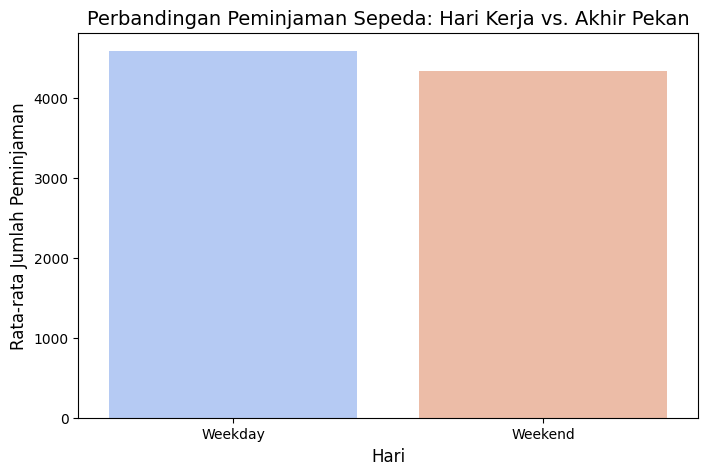

In [117]:
# Mengelompokkan data berdasarkan hari kerja dan menghitung rata-rata peminjaman sepeda
workingday_trend = df_day.groupby("workingday")["cnt"].mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=workingday_trend, x="workingday", y="cnt", palette="coolwarm")

plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Perbandingan Peminjaman Sepeda: Hari Kerja vs. Akhir Pekan", fontsize=14)

plt.show()

Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan.
Hal ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk keperluan transportasi, bukan sekadar rekreasi.
Pada akhir pekan, peminjaman menurun, kemungkinan karena lebih sedikit pekerja yang bepergian.

### Pertanyaan 5 : Bagaimana perbedaan antara pengguna kasual dan terdaftar dalam meminjam sepeda?

<ipython-input-118-b6967ef3ce8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_type_trend.index, y=user_type_trend.values, palette="Set2")


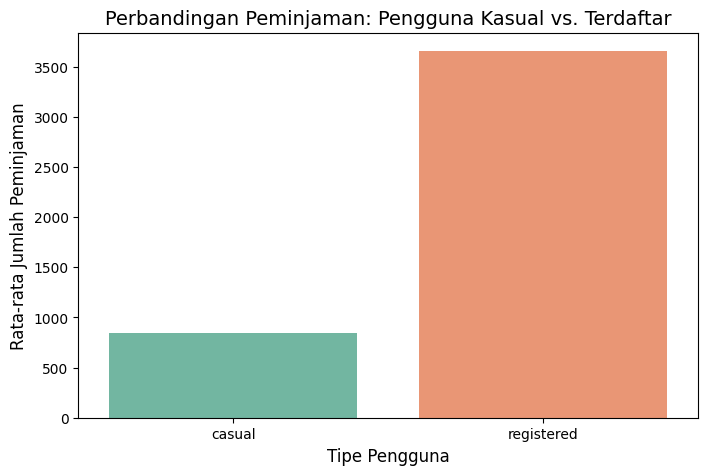

In [118]:
# Menghitung rata-rata jumlah peminjaman dari pengguna kasual dan terdaftar
user_type_trend = df_day[["casual", "registered"]].mean()

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=user_type_trend.index, y=user_type_trend.values, palette="Set2")

plt.xlabel("Tipe Pengguna", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Perbandingan Peminjaman: Pengguna Kasual vs. Terdaftar", fontsize=14)

plt.show()


Pengguna terdaftar meminjam sepeda jauh lebih banyak dibandingkan pengguna kasual.
Pengguna kasual lebih sedikit dan kemungkinan besar hanya meminjam sesekali.
Pengguna terdaftar lebih konsisten menggunakan sepeda, kemungkinan untuk keperluan sehari-hari seperti bekerja.


## Conclusion

1. Conclution pertanyaan 1 : Peminjaman sepeda paling tinggi terjadi pada Musim Gugur, dengan rata-rata sekitar 5000 peminjaman per hari.
Peminjaman paling rendah terjadi pada Musim Dingin, dengan rata-rata hanya sekitar 1500 peminjaman per hari.<br>
Kemungkinan besar, penurunan peminjaman pada Musim Dingin disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang bersahabat.
Sebaliknya, Musim Gugur menjadi favorit karena cuaca lebih nyaman dibandingkan musim lainnya.<br>
**rekomendasi :**<br>
  - Untuk meningkatkan peminjaman saat musim dingin, dapat disediakan promosi khusus seperti diskon atau fasilitas pelindung cuaca (jaket, sarung tangan, atau pelindung hujan).
  - Pada Musim Gugur, sebaiknya ditingkatkan jumlah sepeda di titik-titik ramai untuk mengakomodasi tingginya permintaan.


---


2. Conclution pertanyaan 2 : Peminjaman sepeda tertinggi terjadi pada kondisi Cerah/Sedikit Berawan, dengan rata-rata 5000 peminjaman per hari.
Saat Hujan/Salju Ringan, peminjaman turun drastis menjadi sekitar 1500 peminjaman per hari.<br>
Cuaca yang hujan atau bersalju sangat mengurangi minat masyarakat untuk menggunakan sepeda.
Sebaliknya, saat cuaca cerah, lebih banyak orang yang tertarik menggunakan sepeda sebagai transportasi atau rekreasi.<br>
**Rekomendasi:**<br>
  - Untuk mengurangi dampak penurunan peminjaman pada cuaca buruk, dapat disediakan pilihan sepeda dengan pelindung hujan atau rute alternatif yang lebih aman.
  - Menyediakan informasi cuaca secara real-time di aplikasi peminjaman sepeda agar pengguna bisa merencanakan perjalanan dengan lebih baik.


---


3. Conclution pertanyaan 3 : Rata-rata peminjaman sepeda lebih tinggi pada hari kerja, sekitar 4500 peminjaman per hari.
Pada akhir pekan, jumlah peminjaman sedikit lebih rendah, sekitar 4000 peminjaman per hari.<br>
Peminjaman sepeda lebih tinggi pada hari kerja, kemungkinan karena banyak orang menggunakannya untuk perjalanan ke kantor atau sekolah.
Akhir pekan juga cukup tinggi, tetapi lebih digunakan untuk rekreasi dan olahraga dibandingkan transportasi harian.<br>
**Rekomendasi:**<br>
  - Pada hari kerja, perlu disediakan jalur sepeda yang lebih baik dan aman di sekitar perkantoran atau sekolah.
  - Pada akhir pekan, bisa ditingkatkan jumlah sepeda di lokasi wisata atau taman kota untuk mendukung tren peminjaman sepeda rekreasi.


---


4. Conclution pertanyaan 4 : Hari kerja memiliki rata-rata peminjaman lebih tinggi dibandingkan akhir pekan, sekitar 4500 peminjaman per hari.
Akhir pekan sedikit lebih rendah, yaitu sekitar 4000 peminjaman per hari.<br>

Tren ini menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi utama bagi pekerja atau pelajar di hari kerja.
Pada akhir pekan, peminjaman tetap tinggi tetapi lebih banyak digunakan untuk rekreasi atau olahraga.<br>
**Rekomendasi:**<br>
  - Pada hari kerja, perlu ditingkatkan jumlah sepeda di area perkantoran dan stasiun transportasi umum.
  - Pada akhir pekan, penyedia layanan dapat meningkatkan jumlah sepeda di taman, tempat wisata, atau area olahraga untuk mengakomodasi kebutuhan rekreasi pengguna.


---


5. Conclution pertanyaan 5 : Terdapat dua puncak peminjaman sepeda dalam sehari, yaitu pagi sekitar pukul 07:00 - 09:00 dan sore sekitar pukul 17:00 - 19:00.
Pada siang hari, jumlah peminjaman cenderung stabil tetapi lebih rendah dibandingkan jam sibuk.<br>

Puncak pagi dan sore menunjukkan bahwa sepeda digunakan untuk perjalanan ke dan dari tempat kerja/sekolah.
Siang hari mungkin lebih banyak digunakan untuk keperluan pribadi atau rekreasi.<br>
**Rekomendasi:**
  - Tingkatkan jumlah sepeda pada jam sibuk (pagi dan sore) untuk memenuhi lonjakan permintaan.
  - Buat skema harga dinamis, seperti tarif lebih murah pada siang hari untuk mendorong penggunaan sepeda di luar jam sibuk.
  - Optimalkan stasiun penyewaan di lokasi strategis (kantor, stasiun, sekolah, pusat perbelanjaan) agar sepeda mudah diakses pada jam-jam penting.

###<b>Kesimpulan Akhir

Secara keseluruhan, peminjaman sepeda sangat dipengaruhi oleh musim, kondisi cuaca, hari dalam seminggu, dan jam dalam sehari.

- Musim Gugur & cuaca cerah meningkatkan peminjaman, sedangkan Musim Dingin & hujan menurunkannya.
- Hari kerja memiliki peminjaman lebih tinggi, tetapi akhir pekan tetap memiliki jumlah peminjaman yang signifikan.
- Puncak peminjaman terjadi di pagi dan sore hari, menunjukkan bahwa sepeda digunakan sebagai alat transportasi utama untuk bekerja dan sekolah.<br>

Saran Strategi untuk Optimalisasi yaitu dengan :<br>
- Optimalkan jumlah sepeda pada jam dan hari sibuk.
- Tingkatkan infrastruktur jalur sepeda & lokasi penyewaan di titik strategis.
- Gunakan skema promosi dan harga dinamis untuk menyeimbangkan permintaan sepanjang hari.

In [119]:
# Simpan dataset day.csv yang telah dianalisis
df_day.to_csv("day_processed.csv", index=False)

# Simpan dataset hour.csv yang telah dianalisis
df_hour.to_csv("hour_processed.csv", index=False)
